### Introduction
The objective of this exploratory data analysis report is to predict the sales price for each house in Ames, Iowa. 

### Dataset Description
The source of the dataset was derived from Kaggle.com's House Prices: Advanced Regression Techniques.  URL: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques.  For this report, we are only using the train.csv. It contained 1,460 observations and 81 variables.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
os.chdir('/Users/kelli.okumura/Dropbox (UH)/MSDS/Week 01')

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train.shape

(1460, 81)

### Data Exploration Analysis
#### Table 1. Variable Type Description

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Convert data types.
#Convert float to int: 'LotFrontage', 'MasVnrArea ', 
#Replace NaN values with a default value
df_train['LotFrontage'].fillna(0, inplace=True)
df_train['LotFrontage'] = df_train['LotFrontage'].astype(int)
verify_dtype = df_train['LotFrontage'].dtype
print(f"The data type of 'LotFrontage' is: {verify_dtype}")

df_train['MasVnrArea'].fillna(0, inplace=True)
df_train['MasVnrArea'] = df_train['MasVnrArea'].astype(int)
verify_dtype2 = df_train['MasVnrArea'].dtype
print(f"The data type of 'MasVnrArea' is: {verify_dtype2}")


#Convert to datetype: 'YearBuilt ', 'YearRemodAdd ', 'GarageYrBlt', MoSold', 'YrSold'
df_train['YearBuilt'] = pd.to_datetime(df_train['YearBuilt'], format='%Y')
df_train['YearRemodAdd'] = pd.to_datetime(df_train['YearRemodAdd'], format='%Y')
df_train['GarageYrBlt'] = pd.to_datetime(df_train['GarageYrBlt'], format='%Y')
df_train['MoSold'] = pd.to_datetime(df_train['MoSold'], format='%m')
df_train['YrSold'] = pd.to_datetime(df_train['YrSold'], format='%Y')
verify_dtype3 = df_train['YearBuilt'].dtype
print(f"The data type of 'YearBuilt' is: {verify_dtype3}")

The data type of 'LotFrontage' is: int64
The data type of 'MasVnrArea' is: int64
The data type of 'YearBuilt' is: datetime64[ns]


#### Table 2. Summary Statistics

In [7]:
summary_stats = df_train.describe()
print (summary_stats)

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    57.623288   10516.828082     6.099315   
std     421.610009    42.300571    34.664304    9981.264932     1.382997   
min       1.000000    20.000000     0.000000    1300.000000     1.000000   
25%     365.750000    20.000000    42.000000    7553.500000     5.000000   
50%     730.500000    50.000000    63.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    79.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      5.575342   103.117123   443.639726    46.549315   567.240411  ...   
std       1.112799   180.731373   456.098091   161.319273   441.866955  ...   

#### Figure 1. Histograms of Quantitative Data

/var/folders/89/3203n55x6cs89dghth6qvl6r0000gn/T/ipykernel_57767/3707918541.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_train.hist(ax=ax, edgecolor='black')


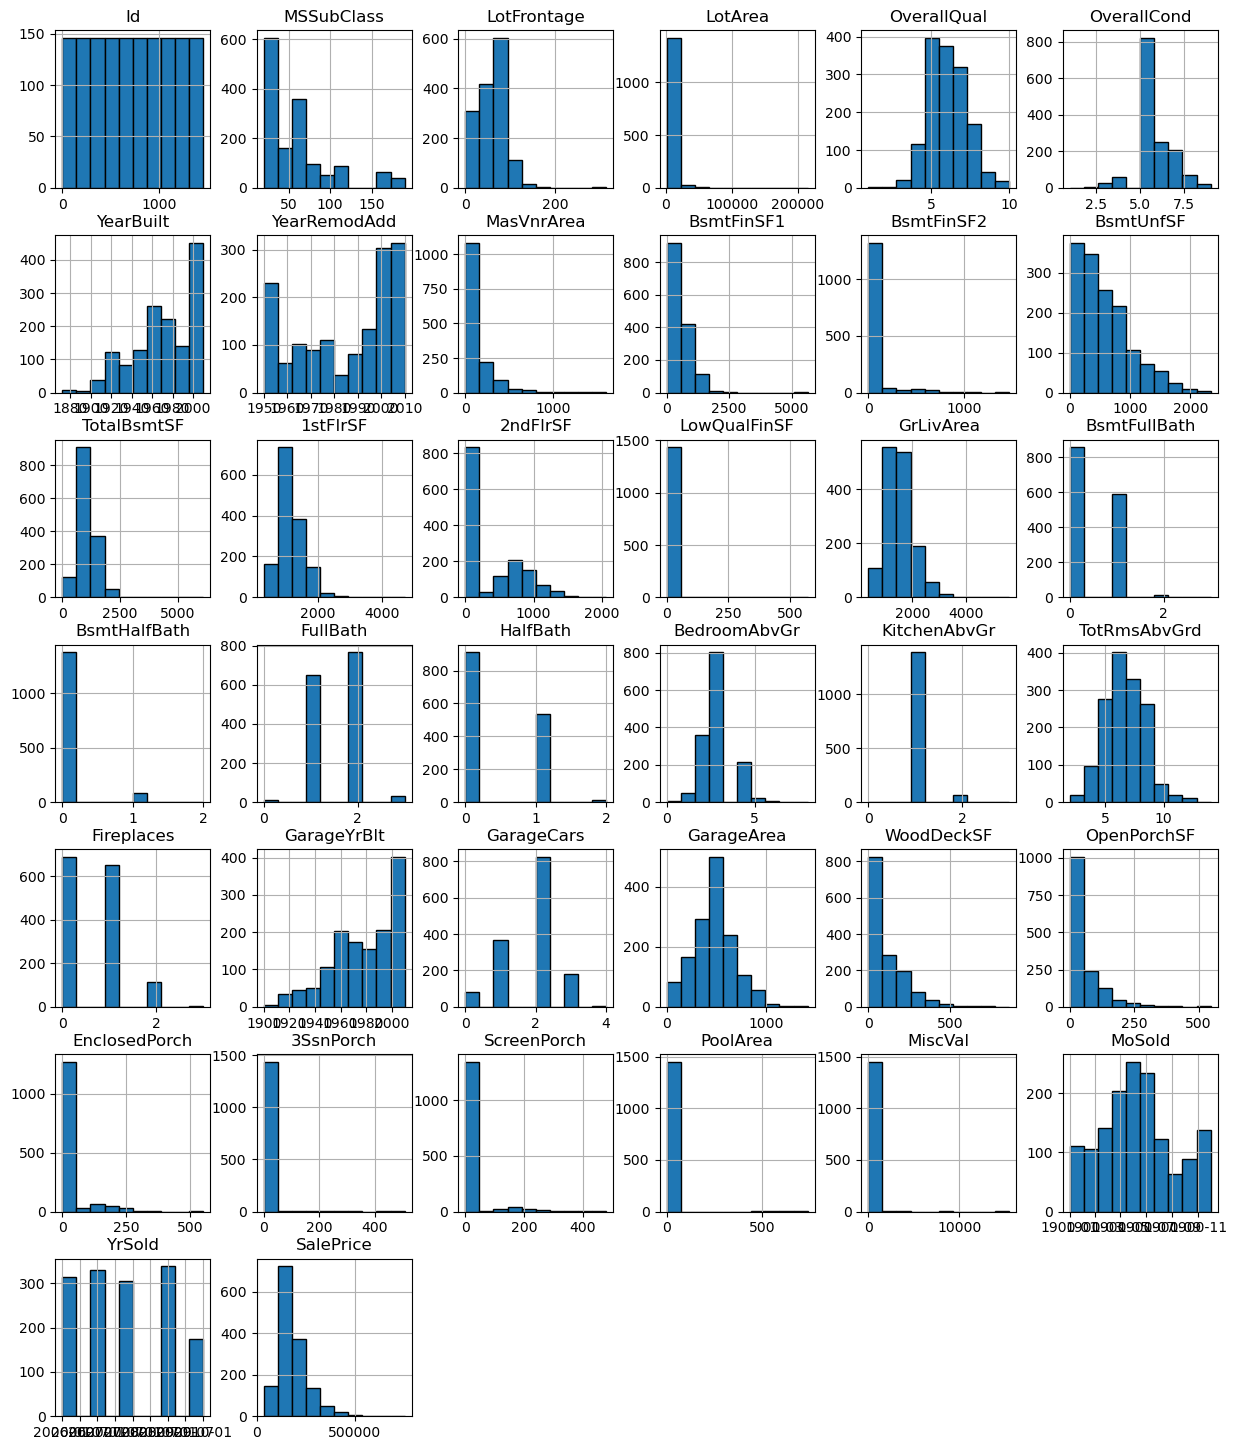

In [8]:
#Create countplots for quantitative variables
fig = plt.figure(figsize = (15,18))
ax = fig.gca()
df_train.hist(ax=ax, edgecolor='black')
plt.show()

In [9]:
categorical_column = df_train.select_dtypes(include=['object']).columns
num_categorical = len(categorical_column)
print("Number of categorical variables: ", num_categorical)

Number of categorical variables:  43


#### Figure 2. Counts for Qualitative Data

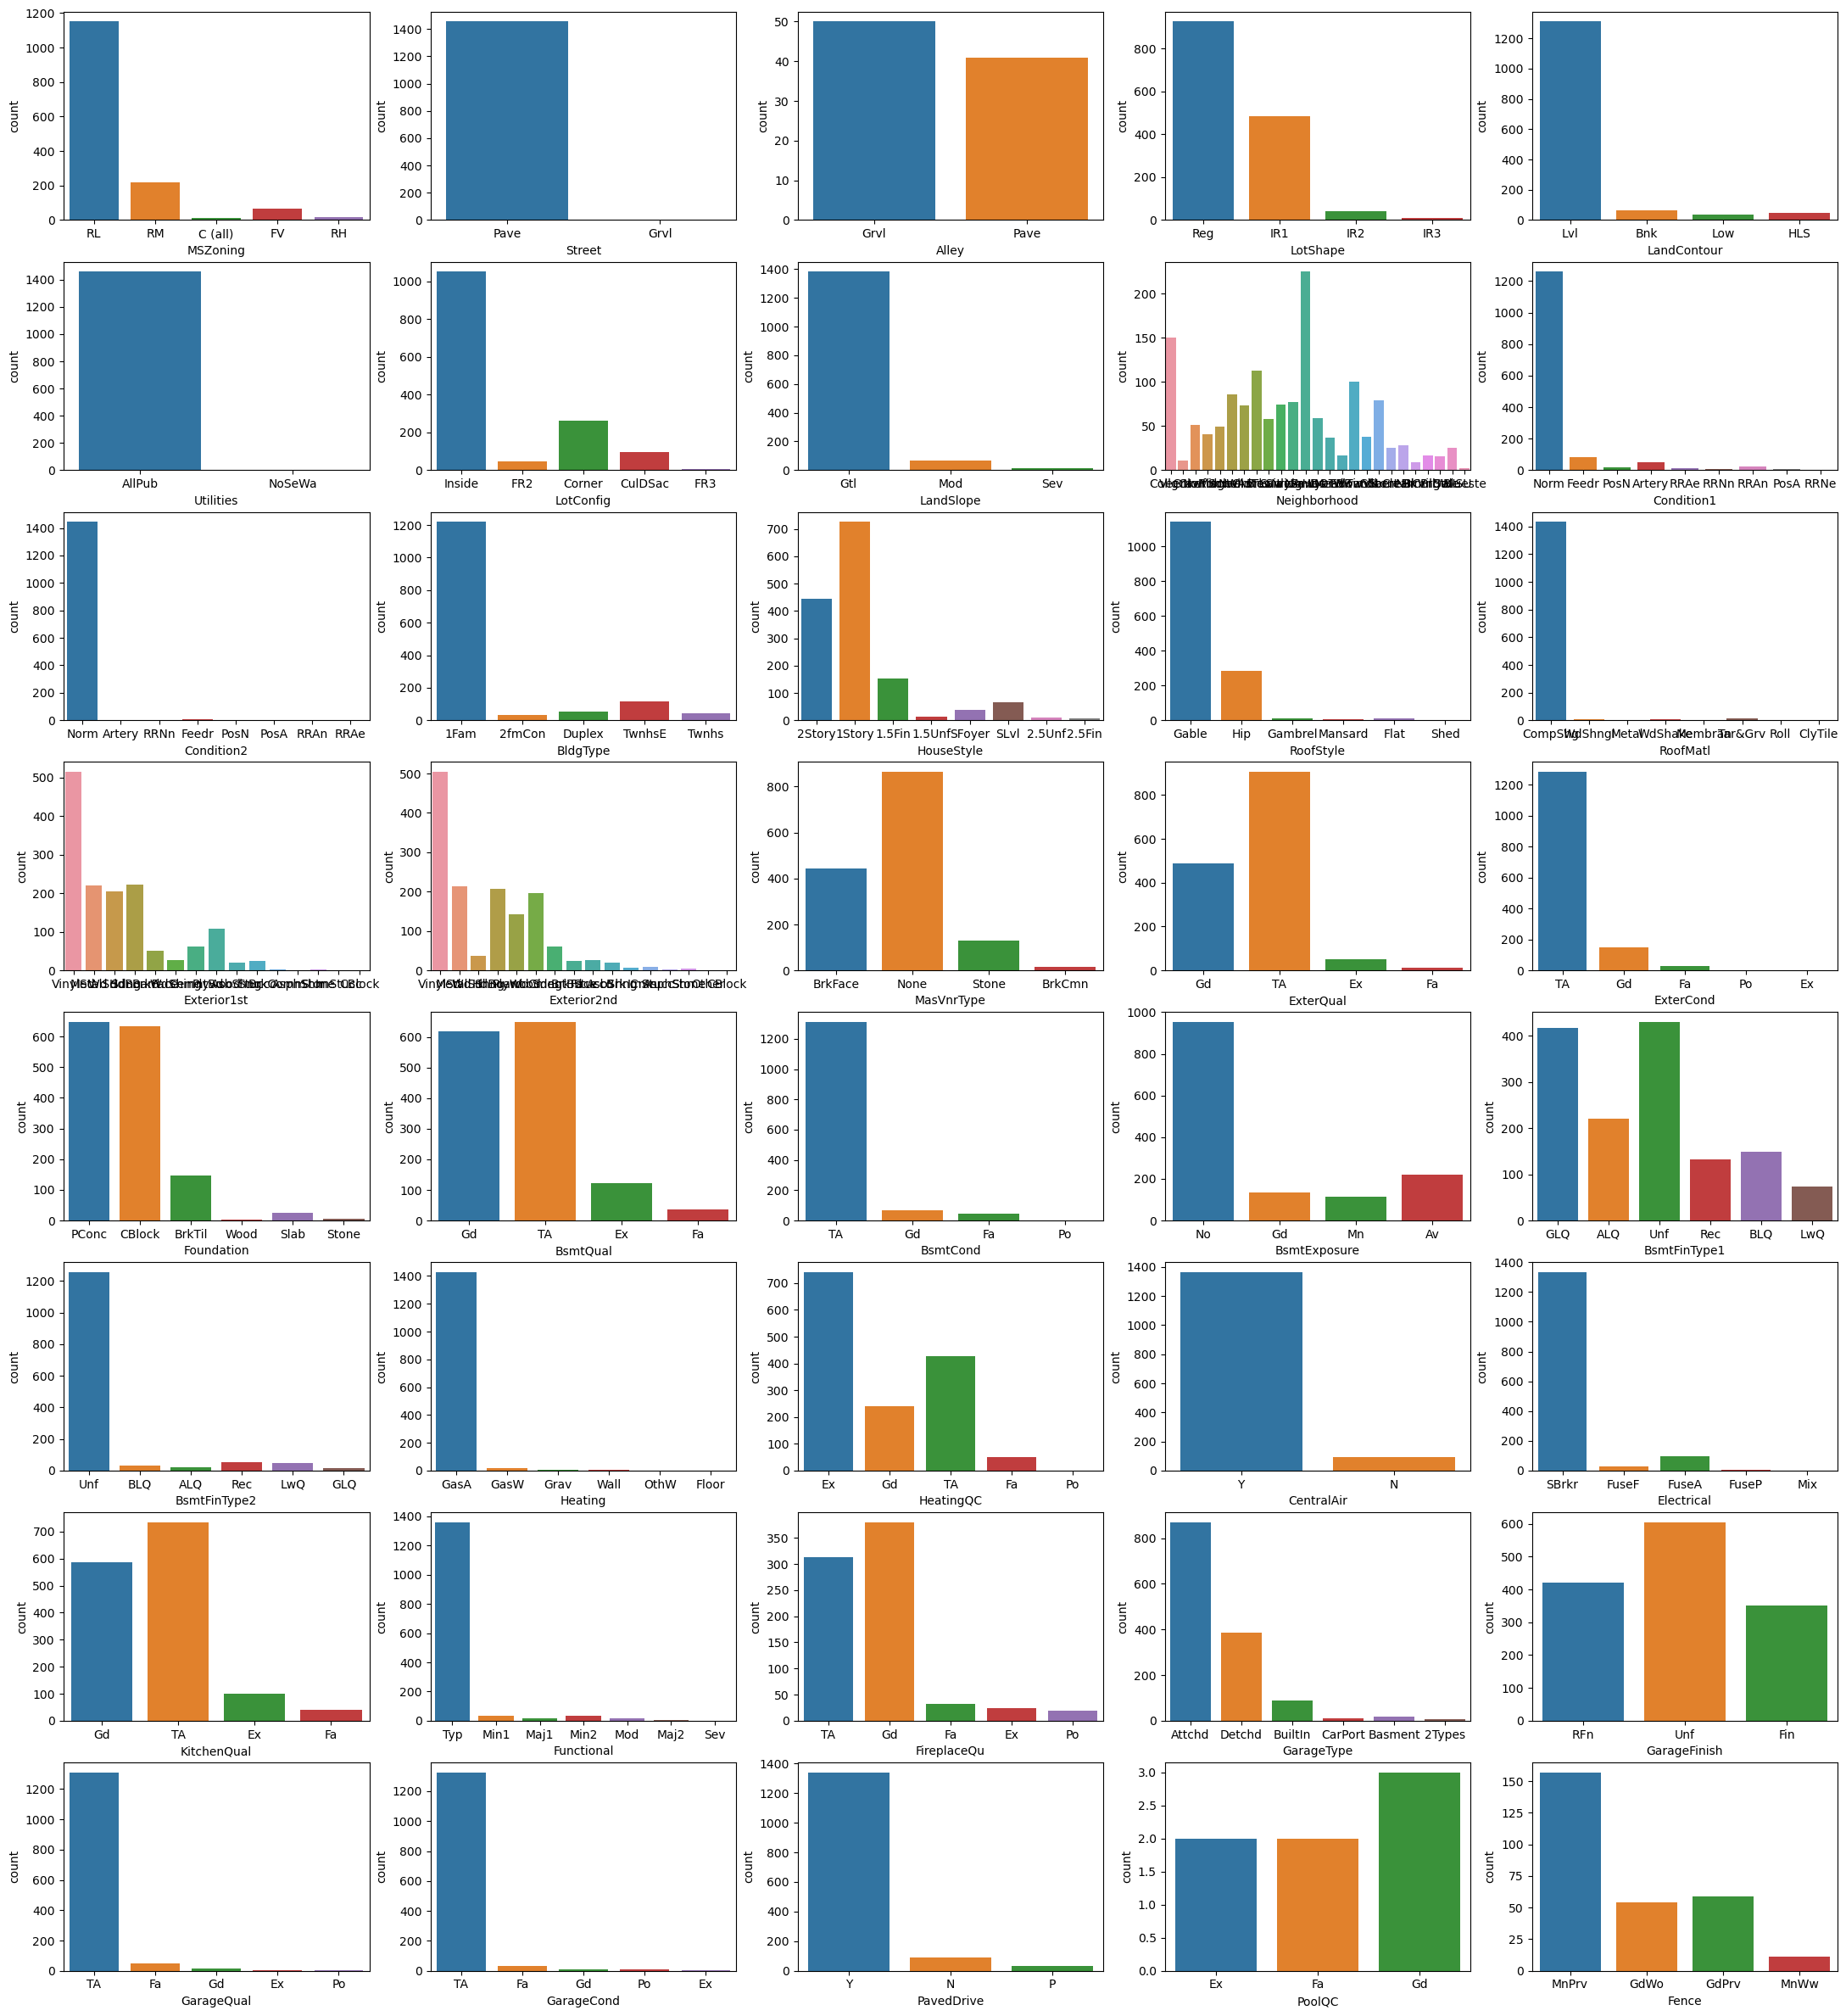

In [10]:
#Create countplots for categorical variables
fig, ax = plt.subplots(8, 5, figsize=(27,30))
categorical_columns = df_train.select_dtypes(include=['object']).columns

for i, subplots in enumerate(ax.flatten()):
    if i < len(categorical_columns):
        sns.countplot(data=df_train, x=categorical_columns[i], ax=subplots)
    else:
        subplots.axis('off')

plt.show()

#### Missing Values

In [11]:
#Find missing values
missing_values = df_train.isna().sum()

# Filter the columns with missing values greater than 0
columns_with_missing_values = missing_values[missing_values > 0]

# Sort the columns by the count of missing values in descending order
sorted_missing_values = columns_with_missing_values.sort_values(ascending=False)

# Display the sorted columns
print("Table 3. Variables with Missing Values:\n", sorted_missing_values)

Table 3. Variables with Missing Values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
Electrical         1
dtype: int64


**Missing Values Discussion** <br>
19 columns have missing values.  

The following 14 can be interpreted as the home does not include this feature.
'PoolQC', 'MiscFeature', 'Fence', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', and 'BsmtQual'. 

'Alley' is defined as 'type of alley access'; categorical data type. 
'LotFrontage' is defined as 'Linear feet of street connected to property; numerical data type.  
'MasVnrArea' and 'MasVnrType' is defined as Masonry veneer area in squart feet and Masonry veneer type.  
'Electrical' is defined as Electrical system.  

What perentage of these variables are missing?

In [12]:
#Get the percentage breakdown of Missing Values per Column
pct_missing_value = (df_train.isna().mean() * 100)

# Filter the columns with missing values greater than 0
filter_missing_value = pct_missing_value[pct_missing_value > 0]

# Sort the columns by the count of missing values in descending order
sorted_pct_missing = filter_missing_value.sort_values(ascending=False)

# Display the sorted columns
print("Table 4. Percentage of Missing Values per Column:\n", sorted_pct_missing)

Table 4. Percentage of Missing Values per Column:
 PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtQual         2.534247
MasVnrType       0.547945
Electrical       0.068493
dtype: float64


**Missing Values Observations** <br>
Based on the data analysis, it has been determined that the variables with the highest percentage of missing values are 'PoolQC' (99.52%), 'MiscFeature' (96.30%), 'Alley' (93.77%), and 'Fence' (80.75%). As such, it is advisable to eliminate these variablested complementary variables, if relevant.

The following variables will be dropped:
'PoolQC' and 'PoolArea', 'MiscFeature' and 'MiscVal', 'Alley', 'Fence'  

Also inlcuding irrelevant columns: 'MoSold' and 'YrSold'

#### Removing Variables

In [64]:
#Drop columns with more than 50% of missing values per column
#Drop irrelevant columns: [MoSold], [YrSold]
columns_to_drop = ['PoolQC', 'PoolArea', 'MiscFeature', 'MiscVal', 'Alley', 'Fence', 'MoSold', 'YrSold']
df_train = df_train.copy().drop(columns_to_drop, axis=1)
df_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,0,61,0,0,0,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,...,TA,Y,298,0,0,0,0,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,0,42,0,0,0,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,...,TA,Y,0,35,272,0,0,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,...,TA,Y,192,84,0,0,0,WD,Normal,250000
5,6,50,RL,85,14115,Pave,IR1,Lvl,AllPub,Inside,...,TA,Y,40,30,0,320,0,WD,Normal,143000
6,7,20,RL,75,10084,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,255,57,0,0,0,WD,Normal,307000
7,8,60,RL,0,10382,Pave,IR1,Lvl,AllPub,Corner,...,TA,Y,235,204,228,0,0,WD,Normal,200000
8,9,50,RM,51,6120,Pave,Reg,Lvl,AllPub,Inside,...,TA,Y,90,0,205,0,0,WD,Abnorml,129900
9,10,190,RL,50,7420,Pave,Reg,Lvl,AllPub,Corner,...,TA,Y,0,4,0,0,0,WD,Normal,118000


### Descriptive Statistics for SalePrice

In [72]:
df_saleprice = df_train['SalePrice']
saleprice_stats = df_saleprice.describe()
print(saleprice_stats)

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


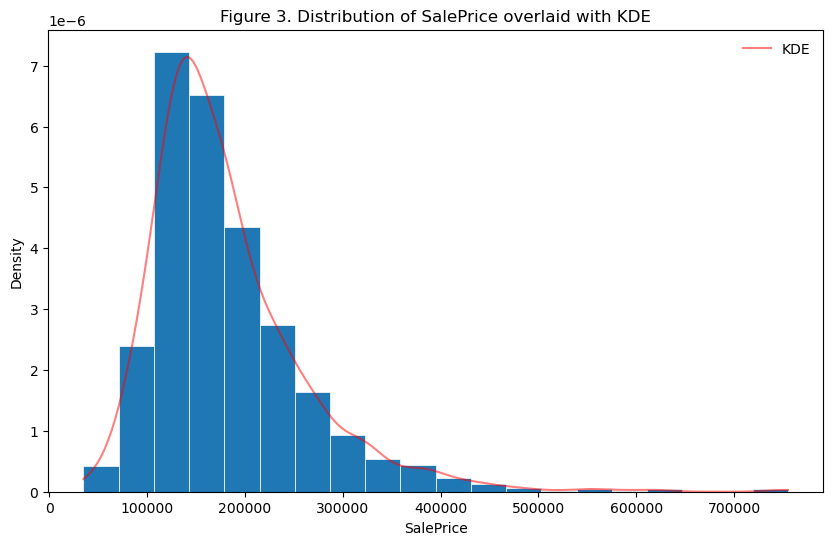

In [73]:
#Histogram of SalePrice
plt.figure(figsize=(10,6))
ax = sns.histplot(data=df_saleprice, bins=20, stat='density', alpha=1, kde=True,
                 edgecolor='white', linewidth=0.5,
                 line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('red')
ax.legend(frameon=False)
ax.set_title('Figure 3. Distribution of SalePrice overlaid with KDE')

plt.show()

In [74]:
#Calculate Skewness
skewness = stats.skew(df_saleprice, axis=0, bias=True)
print("The skewness for SalePrice is ", skewness)

The skewness for SalePrice is  1.880940746034036


In [68]:
#Calculate Kurtosis
kurtosis = stats.kurtosis(df_saleprice, axis=0, bias=True)
print("The kurtosis for SalePrice is ", kurtosis)

The kurtosis for SalePrice is  6.509812011089439


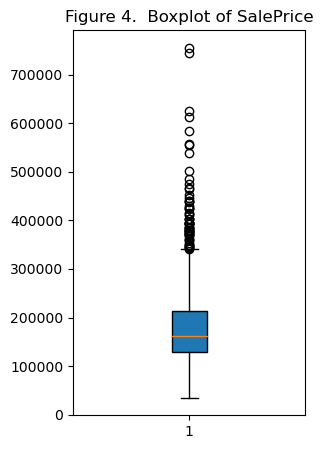

In [75]:
#Create boxplot to see outliers
figure = plt.figure(figsize=(3,5))
plt.boxplot(df_saleprice, patch_artist=True)
plt.title('Figure 4.  Boxplot of SalePrice')
plt.show()

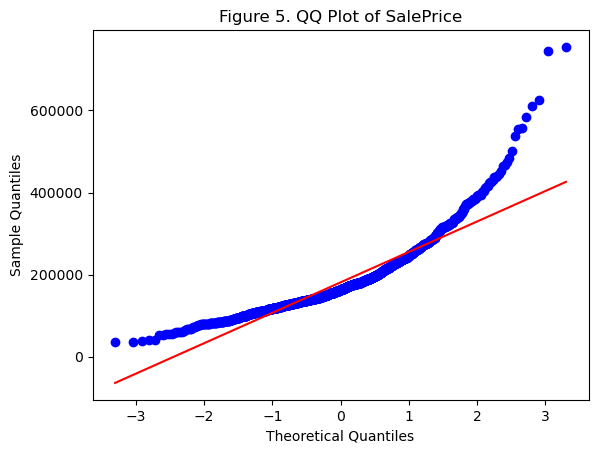

In [76]:
#Create Q-Q Plot
stats.probplot(df_saleprice, dist="norm", plot=plt)
plt.title("Figure 5. QQ Plot of SalePrice")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

#### SalePrice Discussion
Based on the data analysis, it is observed that the 'SalePrice' data is significantly skewed to the right with a skewness value of 1.8809. Additionally, the kurtosis value for a normal distribution is 3, whereas the calculated kurtosis value for 'SalePrice' is 6.5098, indicating a leptokurtosis distribution. Therefore, I believe to perform a log base 10 transformation. 

### Base 10 Log Transformation for SalePrice

In [81]:
# Select only numeric columns
numeric_df = df_train.select_dtypes(include=[np.number])

# Perform a base 10 log transformation
log_df = np.log10(numeric_df)

# Print the result
log_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice
0,0.000000,1.778151,1.812913,3.926857,0.845098,0.69897,2.292256,2.848805,-inf,2.176091,...,0.903090,-inf,0.301030,2.738781,-inf,1.785330,-inf,-inf,-inf,5.319106
1,0.301030,1.301030,1.903090,3.982271,0.778151,0.90309,-inf,2.990339,-inf,2.453318,...,0.778151,0.0,0.301030,2.662758,2.474216,-inf,-inf,-inf,-inf,5.258877
2,0.477121,1.778151,1.832509,4.051153,0.845098,0.69897,2.209515,2.686636,-inf,2.637490,...,0.778151,0.0,0.301030,2.783904,-inf,1.623249,-inf,-inf,-inf,5.349278
3,0.602060,1.845098,1.778151,3.980003,0.845098,0.69897,-inf,2.334454,-inf,2.732394,...,0.845098,0.0,0.477121,2.807535,-inf,1.544068,2.434569,-inf,-inf,5.146128
4,0.698970,1.778151,1.924279,4.154120,0.903090,0.69897,2.544068,2.816241,-inf,2.690196,...,0.954243,0.0,0.477121,2.922206,2.283301,1.924279,-inf,-inf,-inf,5.397940


In [100]:
log_summary_stats = log_df.describe()
print (log_summary_stats)

                Id   MSSubClass  LotFrontage      LotArea  OverallQual  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean      2.731415     1.646437         -inf     3.956787     0.773385   
std       0.429531     0.306050          NaN     0.224725     0.104821   
min       0.000000     1.301030         -inf     3.113943     0.000000   
25%       2.563184     1.301030     1.623249     3.878148     0.698970   
50%       2.863620     1.698970     1.799341     3.976740     0.778151   
75%       3.039513     1.845098     1.897627     4.064514     0.845098   
max       3.164353     2.278754     2.495544     5.332933     1.000000   

       OverallCond   MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean      0.737644         -inf         -inf         -inf         -inf  ...   
std       0.087824          NaN          NaN          NaN          NaN  ...   
min       0.00000

/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/Users/kelli.okumura/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:4573: RuntimeWarning: invalid value en

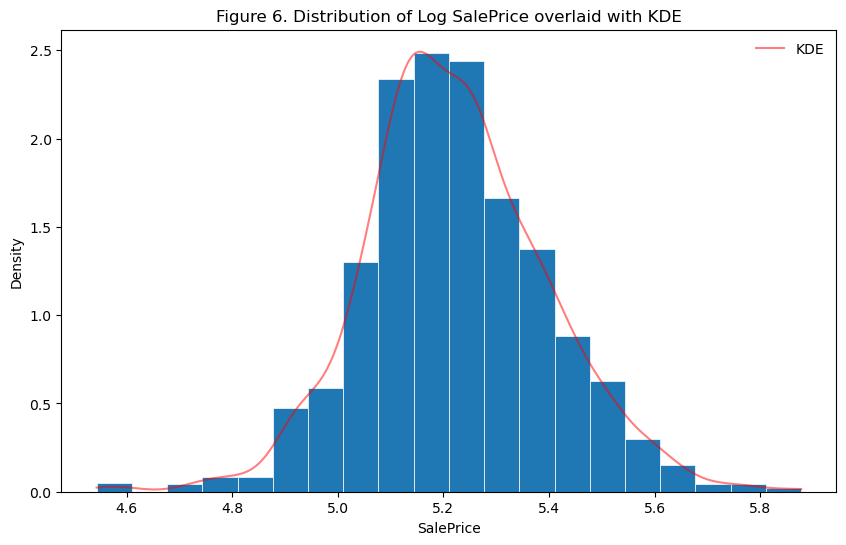

In [87]:
# Review log transformation for SalePrice
log_saleprice = log_df['SalePrice']

plt.figure(figsize=(10,6))
ax = sns.histplot(data=log_saleprice, bins=20, stat='density', alpha=1, kde=True,
                 edgecolor='white', linewidth=0.5,
                 line_kws=dict(color='black', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('red')
ax.legend(frameon=False)
ax.set_title('Figure 6. Distribution of Log SalePrice overlaid with KDE')

plt.show()

In [88]:
#Calculate Skewness
skewness = stats.skew(log_saleprice, axis=0, bias=True)
print("The skewness for Log SalePrice is ", skewness)

The skewness for Log SalePrice is  0.12121036730137275


In [89]:
#Calculate Kurtosis
kurtosis = stats.kurtosis(log_saleprice, axis=0, bias=True)
print("The kurtosis for Log SalePrice is ", kurtosis)

The kurtosis for Log SalePrice is  0.8026555069117722


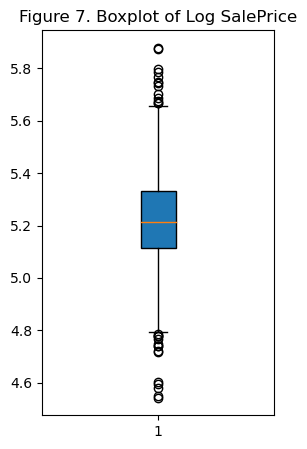

In [90]:
#Create boxplot to see outliers
figure = plt.figure(figsize=(3,5))
plt.boxplot(log_saleprice, patch_artist=True)
plt.title('Figure 7. Boxplot of Log SalePrice')
plt.show()

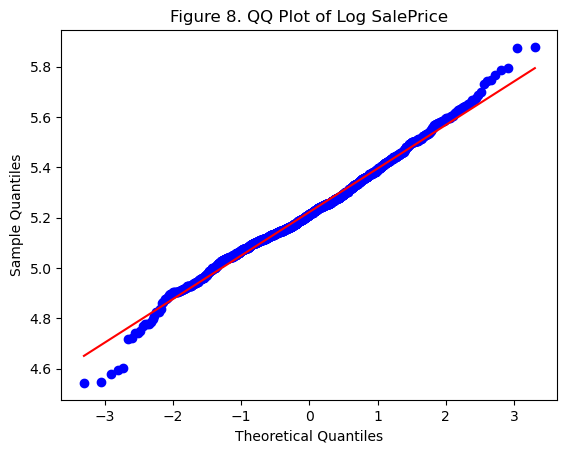

In [93]:
#Create Q-Q Plot
stats.probplot(log_saleprice, dist="norm", plot=plt)
plt.title("Figure 8. QQ Plot of Log SalePrice")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")
plt.show()

#### Log SalePrice Discussion
After applying a base 10 log transformation to SalePrice, the distribution appears normal with skewness of 0.1212 and kurtosis of 0.8026.

### Potential SalePrice Predictors

In [94]:
#Identifying the most correlated values with SalePrice
corr = log_df.corr()
corr_SalePrice = corr['SalePrice'].sort_values(ascending=False)
print(corr_SalePrice)

SalePrice        1.000000
OverallQual      0.794007
GrLivArea        0.730255
2ndFlrSF         0.646814
GarageCars       0.632347
GarageArea       0.610490
1stFlrSF         0.608947
TotalBsmtSF      0.604831
FullBath         0.603065
TotRmsAbvGrd     0.539261
LotArea          0.399918
LotFrontage      0.364108
ScreenPorch      0.329007
MasVnrArea       0.316969
BsmtFinSF1       0.261217
WoodDeckSF       0.257391
BedroomAbvGr     0.220865
EnclosedPorch    0.162847
OpenPorchSF      0.144199
LowQualFinSF     0.130840
3SsnPorch        0.125814
Fireplaces       0.105785
BsmtFinSF2       0.097629
BsmtUnfSF        0.086320
BsmtFullBath     0.020749
OverallCond      0.008710
Id              -0.014394
MSSubClass      -0.019761
BsmtHalfBath    -0.025631
HalfBath        -0.089069
KitchenAbvGr    -0.151365
Name: SalePrice, dtype: float64


### Potential SalePrice Predictors Discussion

The top 5 variables that have a correlation of 0.6 or higher with 'SalePrice' are: <br>

OverallQual: 0.794007<br>
GrLivArea: 0.730255<br>
2ndFlrSF: 0.646814<br>
GarageCars: 0.632347<br>
GarageArea: 0.610490<br>

Because GarageCars and GarageArea are the same, I'll bring in one more which is<br>
1stFlrSF: 0.608947

### Transforming data using Min-Max Scaling

In order to effectively manipulate data, one may consider implementing the technique known as Min-Max Scaling. This process involves transforming numerical data into a range of values between 0 and 1, which can be particularly useful when dealing with datasets that have varying scales. By utilizing this technique, one can ensure that all data points are on a consistent scale, which can be beneficial for analysis and modeling purposes. It is recommended that individuals familiarize themselves with this method in order to optimize their data management practices.

In [106]:
# Select only numeric columns
numeric_columns = log_df.select_dtypes(include=[np.number])

# Remove columns with infinite values
numeric_columns = numeric_columns.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
list(numeric_columns.columns)

['Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 '1stFlrSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'SalePrice']

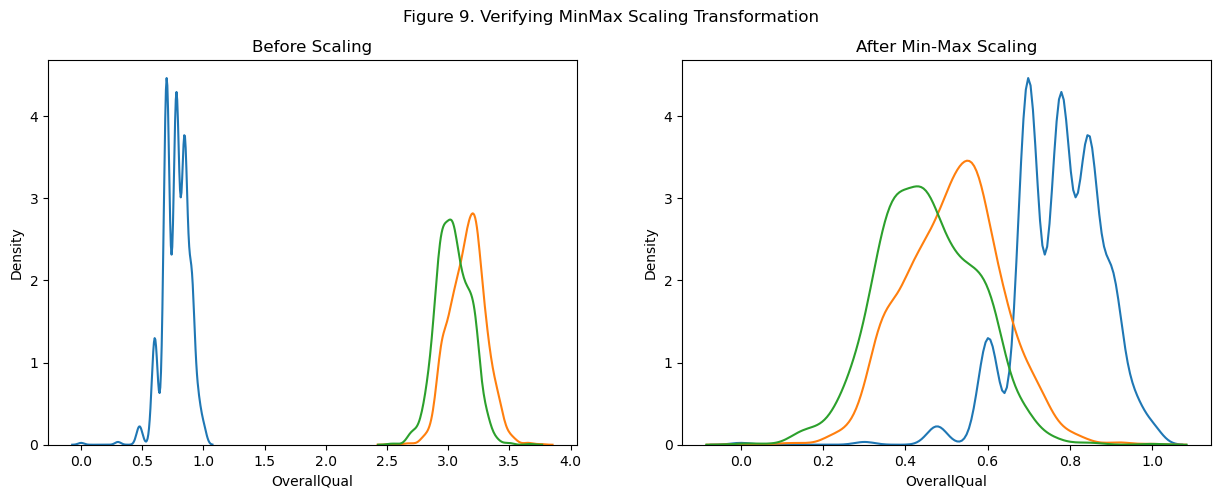

In [105]:
from sklearn import preprocessing

# Pull column names
column_names = numeric_columns.columns

#Min-Max scaling function
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_values = scaler.fit_transform(numeric_columns)

# Convert back to dataframe for graphing
scaled_df = pd.DataFrame(scaled_values, columns=column_names)

fig, (ob1, ob2) = plt.subplots(ncols=2, figsize=(15,5))
ob1.set_title('Before Scaling')
sns.kdeplot(numeric_columns['OverallQual'],ax=ob1)
sns.kdeplot(numeric_columns['GrLivArea'],ax=ob1)
sns.kdeplot(numeric_columns['1stFlrSF'], ax=ob1)

fig.suptitle('Figure 9. Verifying MinMax Scaling Transformation')

ob2.set_title('After Min-Max Scaling')
sns.kdeplot(scaled_df['OverallQual'],ax=ob2)
sns.kdeplot(scaled_df['GrLivArea'],ax=ob2)
sns.kdeplot(scaled_df['1stFlrSF'], ax=ob2)
plt.show()

#### Min-Max Scaling Discussion
During my min-max scaling process, I discovered that having infinite values is not possible. These infinite values were caused by the log transformation. To address this, I opted to remove the columns with infinite values. However, this decision made me a bit uncomfortable since it resulted in reducing my qualitative columns to nine. I am curious to see whether this will be beneficial or detrimental in the long run.

### Transforming data using Standard Scaling (or Sandardization)
Standardization makes variables look like a standard normal distribution. 

In [107]:
from sklearn.preprocessing import StandardScaler

# Fit and transform the data
std_scaler = StandardScaler()
std_scaler_values = std_scaler.fit_transform(numeric_columns)

# Convert back to dataframe
std_scaler_df = pd.DataFrame(std_scaler_values, columns=column_names)
print(numeric_columns.head())
print(std_scaler_df.head())

         Id  MSSubClass   LotArea  OverallQual  OverallCond  1stFlrSF  \
0  0.000000    1.778151  3.926857     0.845098      0.69897  2.932474   
1  0.301030    1.301030  3.982271     0.778151      0.90309  3.101059   
2  0.477121    1.778151  4.051153     0.845098      0.69897  2.963788   
3  0.602060    1.845098  3.980003     0.845098      0.69897  2.982723   
4  0.698970    1.778151  4.154120     0.903090      0.69897  3.058805   

   GrLivArea  TotRmsAbvGrd  SalePrice  
0   3.232996      0.903090   5.319106  
1   3.101059      0.778151   5.258877  
2   3.251881      0.778151   5.349278  
3   3.234770      0.845098   5.146128  
4   3.342028      0.954243   5.397940  
         Id  MSSubClass   LotArea  OverallQual  OverallCond  1stFlrSF  \
0 -6.361248    0.430516 -0.133231     0.684385    -0.440508 -0.803570   
1 -5.660173   -1.128983  0.113442     0.045487     1.884487  0.418585   
2 -5.250070    0.430516  0.420061     0.684385    -0.440508 -0.576560   
3 -4.959098    0.649335  0.10

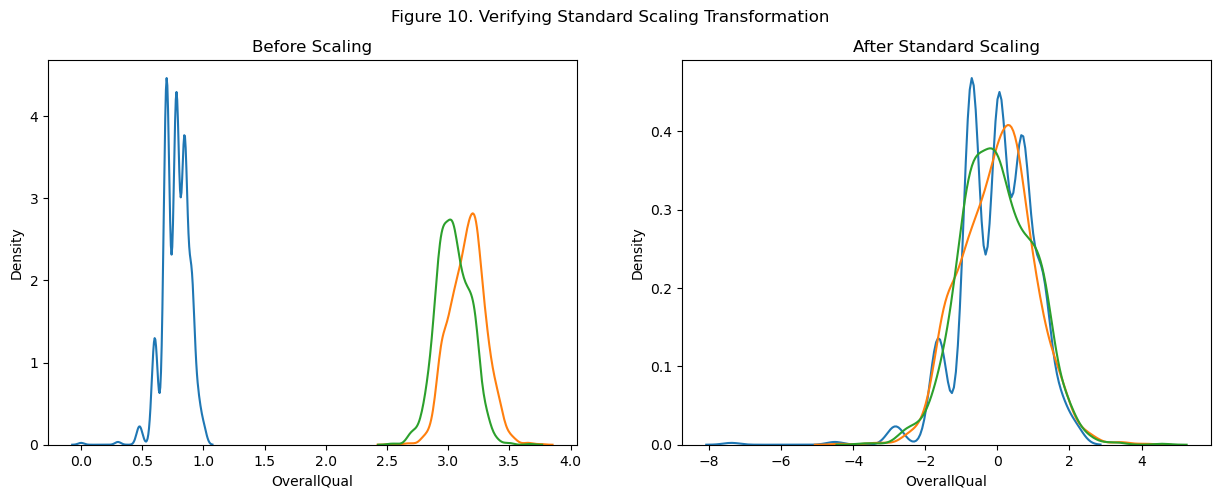

In [109]:
fig, (ob1, ob2) = plt.subplots(ncols=2, figsize=(15,5))
ob1.set_title('Before Scaling')
sns.kdeplot(numeric_columns['OverallQual'],ax=ob1)
sns.kdeplot(numeric_columns['GrLivArea'],ax=ob1)
sns.kdeplot(numeric_columns['1stFlrSF'], ax=ob1)

fig.suptitle('Figure 10. Verifying Standard Scaling Transformation')

ob2.set_title('After Standard Scaling')
sns.kdeplot(std_scaler_df['OverallQual'],ax=ob2)
sns.kdeplot(std_scaler_df['GrLivArea'],ax=ob2)
sns.kdeplot(std_scaler_df['1stFlrSF'], ax=ob2)
plt.show()